In [135]:
import matplotlib.pyplot as plt
from matplotlib import animation
import math
import numpy as np
# %matplotlib notebook

In [136]:
#f''(t) + P(t)f'(t) + Q(t)*f(t) = R(t)
def P(t):
    return 0
def Q(t):
    return 0
def R(t):
    return -9.8

In [137]:
h = 0.0001
t = 0
input_value = []
output_value_1 = []
output_value_2 = []
input_value.append(0)
output_value_1.append(10)
output_value_2.append(0)
for i in range(1,20000):
    output_value_1.append(output_value_1[i-1]+output_value_2[i-1]*h)
    output_value_2.append(output_value_2[i-1] + h*(R(input_value[i-1])-P(input_value[i-1])*output_value_2[i-1]-Q(input_value[i-1])*output_value_1[i-1]))
    t = t + h
    input_value.append(t)   
    if(output_value_1[i] <= 0):
        break

In [138]:
plt.plot(input_value,output_value_1,'k-')
plt.xlabel("time")
plt.ylabel("Height")

Text(30.972222222222214, 0.5, 'Height')

In [139]:
initial_velocity = 10 
angle = 30
v_x = initial_velocity*math.cos(math.radians(angle))
v_y = initial_velocity*math.sin(math.radians(angle))

In [140]:
h = 0.0001
t = 0
input_value = []
output_value_1 = []
output_value_2 = []
input_value.append(0)
output_value_1.append(0)
output_value_2.append(v_y)
for i in range(1,20000):
    output_value_1.append(output_value_1[i-1]+output_value_2[i-1]*h)
    output_value_2.append(output_value_2[i-1] + h*(R(input_value[i-1])-P(input_value[i-1])*output_value_2[i-1]-Q(input_value[i-1])*output_value_1[i-1]))
    t = t + h
    input_value.append(t)   
    if(output_value_1[i] <= 0):
        break

In [141]:
def func():
    return v_x
output_value = []
t = 0
output_value.append(0)
print()
for i in range(1,20000):
    output_value.append(output_value[i-1]+func()*h)
    t = t + h
    if(t>=input_value[len(input_value)-1]):
        break

In [142]:
print(len(output_value_1))
print(len(output_value))
plt.plot(output_value,output_value_1,'k-')

10207
10207


In [143]:
range_numerical = max(output_value)
max_height_numerical = max(output_value_1)
time_of_flight_numerical = input_value[len(input_value)-1]
print(range_numerical)
print(max_height_numerical)
print(time_of_flight_numerical)

8.83865527102227
1.2757602059997815
1.020599999999904


In [144]:
range_analytical = (2*v_x*v_y)/9.8
max_height_analytical = v_y**2/(2*9.8)
time_of_flight_analytical = (2*v_y)/9.8
print(range_analytical)
print(max_height_analytical)
print(time_of_flight_analytical)

8.83699391616774
1.2755102040816322
1.020408163265306


**With RK4**

In [145]:
def RungeKutta4(g,f,x0,y0,z0,xend,h):
    x = x0
    y = y0
    z = z0
    output_data = []
    input_data = []
    derivative_data = []
    while (x<xend):
        output_data.append(y)
        input_data.append(x)
        derivative_data.append(z)
        k0 = h*f(x,y,z)
        l0 = h*g(x,y,z)
        k1 = h*f(x+h/2,y+k0/2,z+l0/2)
        l1 = h*g(x+h/2,y+k0/2,z+l0/2)
        k2 = h*f(x+h/2,y+k1/2,z+l1/2)
        l2 = h*g(x+h/2,y+k1/2,z+l1/2)
        k3 = h*f(x+h,y+k2,z+l2)
        l3 = h*g(x+h,y+k2,z+l2)
        y+=(k0+2*k1+2*k2+k3)/6
        z+=(l0+2*l1+2*l2+l3)/6
        x+=h
    return derivative_data,input_data,output_data

In [146]:
#Free falling ball
def g(x,y,z):
    return -9.8
def f(x,y,z):
    return z

In [147]:
derivative_data,input_data,output_data = RungeKutta4(g,f,0,10,0,1.5,0.1)

In [148]:
def solution(x):
    return 10-0.5*9.8*x*x

In [149]:
plt.plot(input_data,output_data,'k-')
x = np.linspace(0,1.5,100)
plt.plot(x,solution(x),'r-')

In [150]:
# Projectile Motion
initial_velocity = 10
angle = 30
v_x = initial_velocity*math.cos(math.radians(angle))
v_y = initial_velocity*math.sin(math.radians(angle))

In [151]:
def g(x,y,z):
    return -9.8
def f(x,y,z):
    return z
derivative_data,input_data,y = RungeKutta4(g,f,0,0,v_y,1.1,0.01)
def g(x,y,z):
    return 0
def f(x,y,z):
    return v_x
derivative_data,input_data,x = RungeKutta4(g,f,0,0,v_x,1.1,0.01)
plt.plot(x,y,'k-')
plt.xlabel("Horizontal")
plt.ylabel("Vertical")

Text(30.972222222222214, 0.5, 'Vertical')

**Part 3**

In [152]:
# Setting up the problem
# G = 6.6743e-11
# m1 = 10e24
# m2 = 2e30
# mu = m1
# k = G*m1*m2
# l = 2.7e40
# r = 147.1e9
# r_dot = 30.29e3

G = 1
m1 = 1
m2 = 100
mu = m1
k = G*m1*m2
l = 10
r = 1
r_dot = 0

In [153]:
h = 0.01
def g(x,y,z):
    return (l**2/mu**2)/(y**3)- (k/mu)/(y**2)
def f(x,y,z):
    return z
derivative_data,input_data,output_data = RungeKutta4(g,f,0,r,r_dot,10,h)
def func_theta(r):
    return l/mu/(r**2)
theta_out = []
theta_out.append(func_theta(output_data[0]))
for i in range(1,len(output_data)):
    theta_out.append(h*func_theta(output_data[i-1])+theta_out[i-1])

In [154]:
plt.plot(input_data,output_data,'k-')
plt.show()

In [155]:
plt.plot(input_data,theta_out,'k-')

In [156]:
def x(r,theta):
    return r*math.cos(theta)
def y(r,theta):
    return r*math.sin(theta)
x_out = []
y_out = []
for i in range(0,len(output_data)):
    x_out.append(x(output_data[i],theta_out[i]))
    y_out.append(y(output_data[i],theta_out[i]))
plt.plot(x_out,y_out,'k-')
plt.gca().set_aspect('equal')

In [157]:
def Energy(r_dot,r):
    return 0.5*(mu*r_dot**2)+0.5*(l**2/((mu*r)**2))-k/r

In [158]:
energy_out = []
for i in range(0,len(output_data)):
    energy_out.append(Energy(derivative_data[i],output_data[i]))
print(energy_out[0])

-50.0


In [129]:
plt.plot(input_data,energy_out,'k-')
plt.show()

<IPython.core.display.Javascript object>


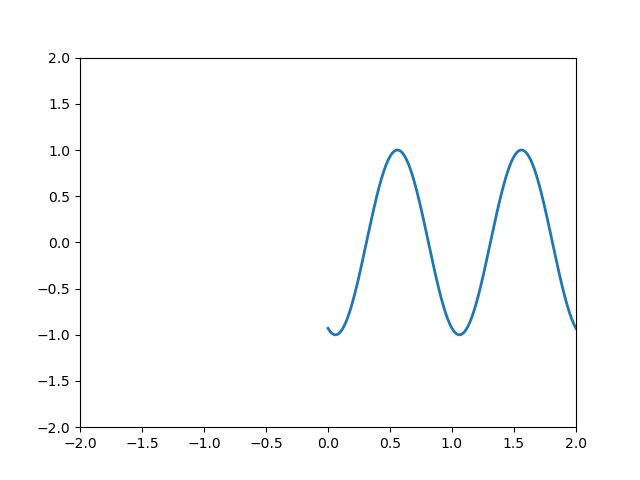

In [169]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(-2, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
#     x = np.linspace(0, 2, 1000)
#     y = np.sin(2 * np.pi * (x - 0.01 * i))
    x = x_out[i]
    y = y_out[i]
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()